<a href="https://colab.research.google.com/github/vaitulsidhdhapara/Hotel-Booking-Analysis/blob/main/Team_Colab_Hotel_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# import the dataset in the "a"

a=pd.read_csv("/content/drive/MyDrive/Capstone-1-Hotel Booking Analysis/Hotel Bookings.csv")

In [109]:
# top five rows...
a.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [110]:
# columns name....

a.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [111]:
# the number of rows and number of columns in the dataset
a.shape

(119390, 32)

# ***DATA PRE-PROCESSING***  

# **1**. **Cleaning** **the** **data**     
# **2. Manage the NaN(Missing) values**
# **3. Changing datatype of necessary data**

In [112]:
# dataframe of duplicate rows 

a[a.duplicated()].shape

(31994, 32)

In [113]:
# drop the duplicate rows from the dataset

a.drop_duplicates(inplace=True)

In [114]:
# now get updated dataset's row and columns

a.shape

(87396, 32)

In [115]:
# How many null values in the data 

a.isnull().sum().sort_values(ascending=False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [116]:
# In the "company" and "agent" columns we can take a value is 0 inplace of NaN, beacuse sometimes customer not book the hotel through company and agent.

a[["company","agent"]]=a[["company","agent"]].fillna(0)

In [117]:
# For missing values of"children" column value, replace it with mean value of children.

a["children"].fillna(round(a["children"].mean()),inplace=True)

In [118]:
# For the missing values of "country" column, replace it with mode of this column. (value that is most repeated)

# Find the mode
a["country"].mode()

0    PRT
dtype: object

In [119]:
# Replace  NaN  with  "PRT" which is mode

a["country"].fillna("PRT",inplace=True)

In [120]:
# Here some rows with total number of adults, children and babies equal to zero , so it is wrong data. we remove it.

a[a['adults']+a['children']+a['babies']==0].shape

(166, 32)

In [121]:
# Drop from the database

a.drop(a[a['adults']+a['children']+a['babies']==0].index,inplace=True)

In [122]:
# Reset the new index and remove old index numbers.

a.reset_index(inplace=True)


In [123]:
a.drop("index",axis=1,inplace=True)

In [124]:
# check null

a.isnull().sum().sort_values(ascending=False)[0:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [125]:
# Here datatype of "children","agent" and "company" columns is float
# Convert float into int

a[['children','agent','company']]=a[['children','agent','company']].astype('int')  

In [126]:
# Datatype of column 'reservation_status_date' is convert in to datetime format

a['reservation_status_date'] = pd.to_datetime(a['reservation_status_date'], format = '%Y-%m-%d')

In [127]:
a.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [128]:
a.shape

(87230, 32)

# ***EDA  ( EXPLORATORY DATA ANALYSIS )***

In [129]:
a.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## *1) Which year have a more number of bookings?*

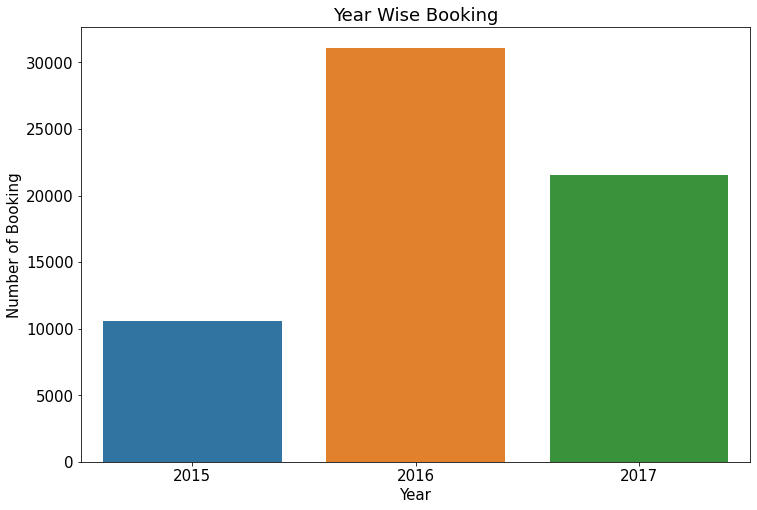

In [130]:
bookings=a[a["is_canceled"]==0]
year_wise_booking=pd.DataFrame(bookings["arrival_date_year"].value_counts())
plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams.update({"font.size": 15})
sns.barplot(x=year_wise_booking.index,y=year_wise_booking["arrival_date_year"])
plt.ylabel("Number of Booking")
plt.xlabel("Year")
plt.title("Year Wise Booking")
plt.show()







* From the above chart we can say that 2016 has the highest bookings and 2015 has lowest bookings.





## *2) How many bookings are done in every year according to the hotel ?*

In [131]:
booking=a[a["is_canceled"]==0]
v=pd.DataFrame(booking.groupby(["hotel","arrival_date_year"]).size().reset_index())
v.rename(columns={0:"name"},inplace=True)
data=v.pivot(index="arrival_date_year",columns="hotel",values="name")

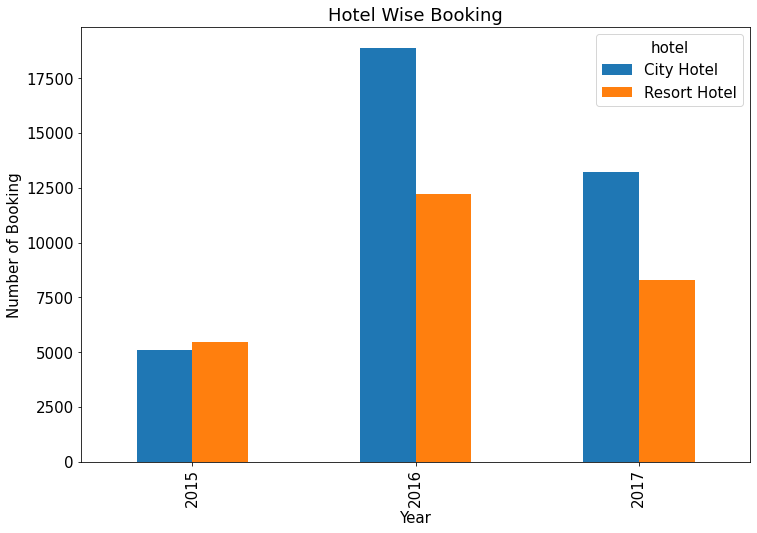

In [132]:
plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams.update({"font.size": 15})
data.plot(kind="bar")
plt.ylabel("Number of Booking")
plt.xlabel("Year")
plt.title("Hotel Wise Booking")
plt.show()

*   We can see that generally City Hotel has more bookings than Resort Hotel.

## *3) What is the booking cancellation ratio ?*

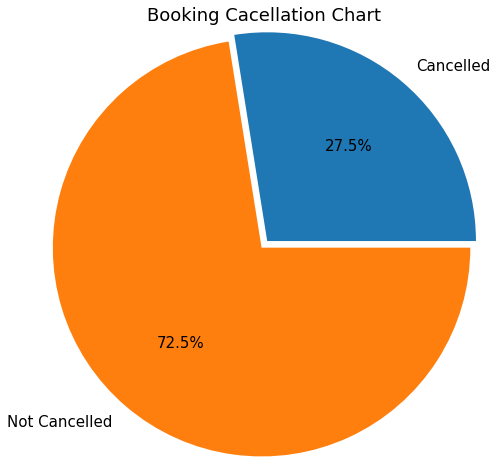

In [133]:

x=a[a["is_canceled"]==1]["is_canceled"].value_counts()
y=a[a["is_canceled"]==0]["is_canceled"].value_counts()
h=list(x.values)+list(y.values)
tp=["Cancelled","Not Cancelled"]
plt.rcParams.update({"font.size": 15})
plt.pie(h,labels=tp,autopct='%0.1f%%',explode=[0.025]*2,radius=1.2)
plt.title("Booking Cacellation Chart")
plt.show()




*  About 27.5% bookings are cancelled.

## *Which hotel has higher bookings cancellation rate ?*

In [134]:
q=a[a["is_canceled"]==1]
w=pd.DataFrame(q.groupby(["hotel"]).size().reset_index())
w.rename(columns={0:"cancelled booking"},inplace=True)

e=pd.DataFrame(a.groupby(["hotel"]).size())
r=pd.DataFrame(a.groupby(["hotel"]).size().reset_index())
r.rename(columns={0:"total booking"},inplace=True)

t=pd.merge(w,r,on="hotel",how="left")
t["cancel_%"]=round(t["cancelled booking"]/t["total booking"]*100,2)


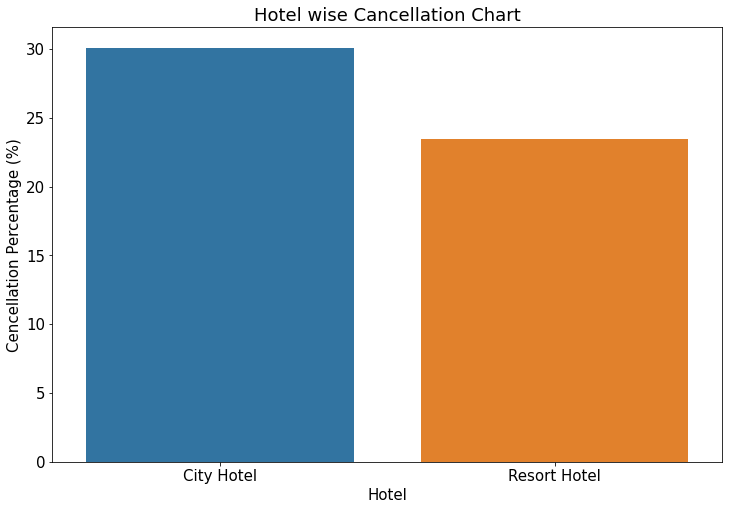

In [135]:
plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams.update({"font.size": 15})
sns.barplot(x=t["hotel"],y=t["cancel_%"])
plt.ylabel("Cencellation Percentage (%)")
plt.xlabel("Hotel")
plt.title("Hotel wise Cancellation Chart")
plt.show()



*  City Hotel(30%) has higher cancellation percentage than Resort Hotel(23%).

## *5) Which month has maximum bookings ?*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


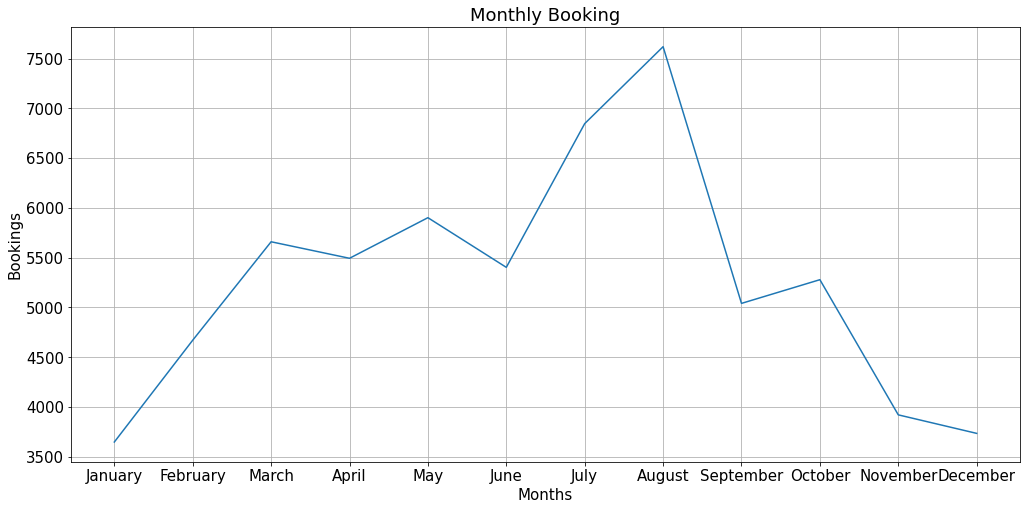

In [136]:
m=a[a["is_canceled"]==0]
index = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
m['arrival_date_month'] = pd.Categorical(m['arrival_date_month'],categories=index,ordered=True)
p=pd.DataFrame(m.groupby(["arrival_date_month"]).size())
plt.rcParams["figure.figsize"]=(17,8)
plt.rcParams.update({"font.size": 15})
plt.plot(p) 
plt.ylabel("Bookings")
plt.xlabel("Months")
plt.title("Monthly Booking")
plt.grid()
plt.show()

*   We can see from above graph that bookings increase from January to August 
while bookings decrease from August to December.
*   From this it can be said that August is the busiest month.



## *6) Which agent does the most bookings?*

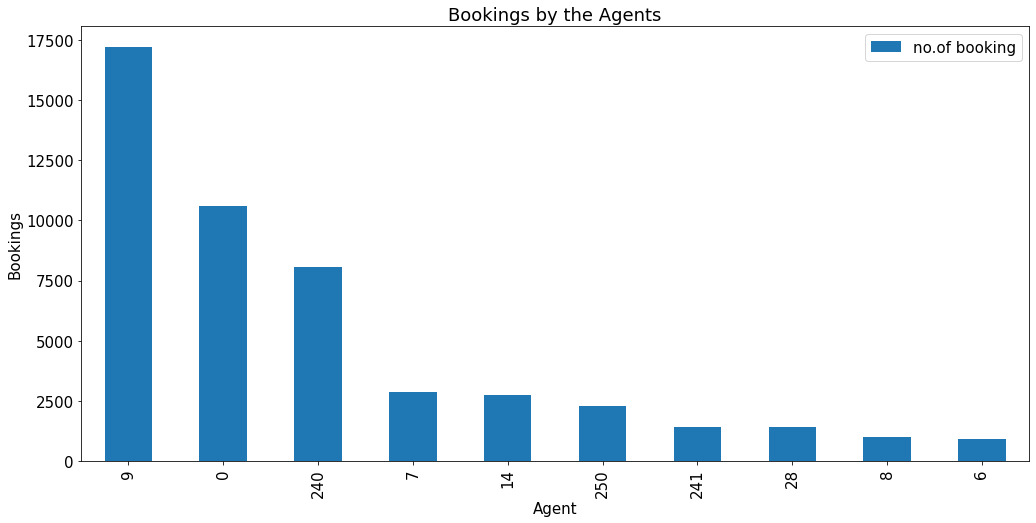

In [137]:
m=a[a["is_canceled"]==0]
g=pd.DataFrame(m.groupby(['agent']).size().sort_values(ascending=False))[:10].rename(columns={0:"no.of booking"})
plt.rcParams["figure.figsize"]=(17,8)
plt.rcParams.update({"font.size": 15})
g.plot(kind="bar")
plt.ylabel("Bookings")
plt.xlabel("Agent")
plt.title("Bookings by the Agents")
plt.show()
                    

*   Most bookings are done by Agent 9.

## *7) Which agent has the lowest booking cancellation ratio ?*

In [138]:
cancelled_booking_df=a[a["is_canceled"]==1]
hj=pd.DataFrame(cancelled_booking_df["agent"].value_counts()).reset_index().rename(columns={"agent":"no.of_cancelled_by_agent","index":"agent"})
vb=pd.DataFrame(a.groupby(['agent']).size().sort_values(ascending=False)).rename(columns={0:"no.of booking"})
df=pd.merge(hj,vb,on="agent",how="left")
df["cancellation_percentage"]=(df["no.of_cancelled_by_agent"]/df["no.of booking"])*100
df.sort_values(by=["cancellation_percentage"],inplace=True)
op=df[:5]

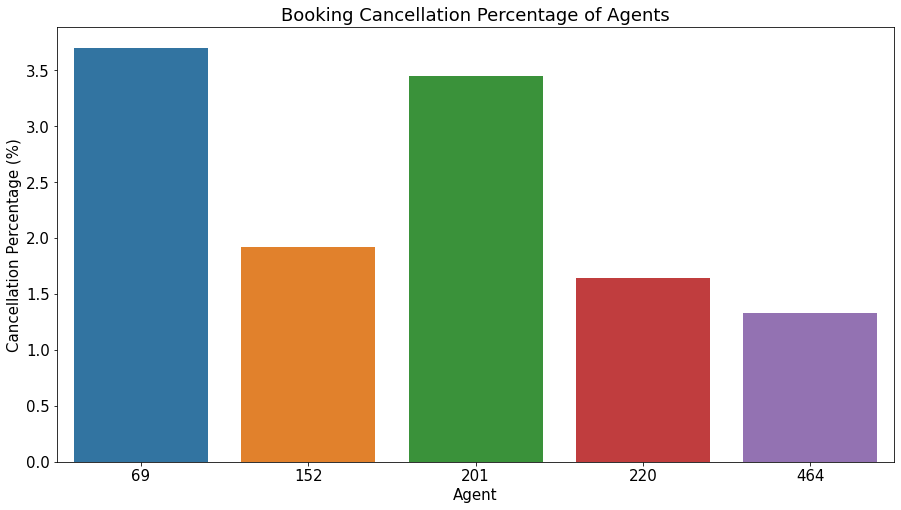

In [139]:
plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams.update({"font.size": 15})
sns.barplot(x=op["agent"],y=op["cancellation_percentage"])
plt.ylabel("Cancellation Percentage (%)")
plt.xlabel("Agent")
plt.title("Booking Cancellation Percentage of Agents")
plt.show()

*   Agent 464 has the lowest booking cancellation ratio.

## *8) Which distribution channel has highest booking rate ?*

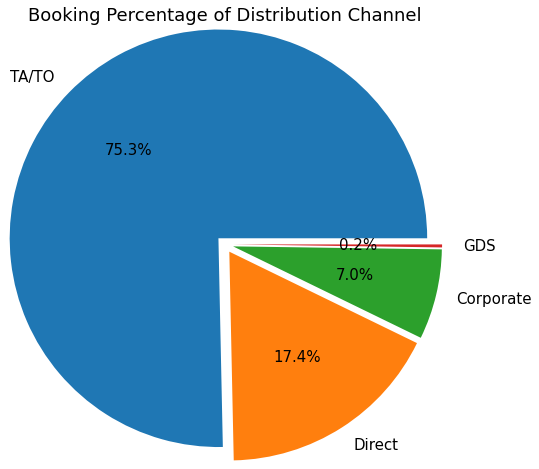

In [140]:
pj=pd.DataFrame(a[a["is_canceled"]==0]['distribution_channel'].value_counts().reset_index().rename(columns={"index":"distribution_channel","distribution_channel":"total_no_booking"}))
plt.pie(x=pj['total_no_booking'][:4],labels=pj['distribution_channel'][:4],autopct='%0.1f%%',explode=[.05]*4,radius=1.2)
plt.title("Booking Percentage of Distribution Channel")
plt.show()

*   TA/TO distribution channel does the highest bookings (75.30%).

## *9) Which distribution channel has highest cancellation percentage?*

In [141]:

hj=pd.DataFrame(a['distribution_channel'].value_counts().reset_index().rename(columns={"index":"distribution_channel","distribution_channel":"total_no.of booking"}))
kj=pd.DataFrame(a[a["is_canceled"]==1]['distribution_channel'].value_counts().reset_index().rename(columns={"index":"distribution_channel","distribution_channel":"total_no.of_calncelled_booking"}))
final=pd.merge(hj,kj,how="left",on="distribution_channel")
final["cancel_%"]=final["total_no.of_calncelled_booking"]/final["total_no.of booking"]*100

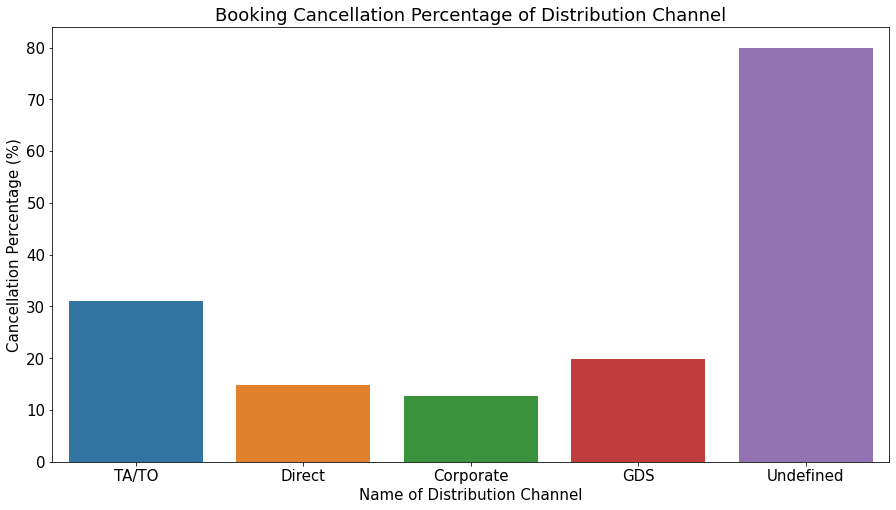

In [142]:
plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams.update({"font.size": 15})
sns.barplot(x=final["distribution_channel"],y=final["cancel_%"])
plt.ylabel("Cancellation Percentage (%)")
plt.xlabel("Name of Distribution Channel")
plt.title("Booking Cancellation Percentage of Distribution Channel")
plt.show()

*   Undefined (80%) and TA/TO (31%)  has the highest cancellation percentage.

## *10) Which type of deposit is preferred by customers ?*

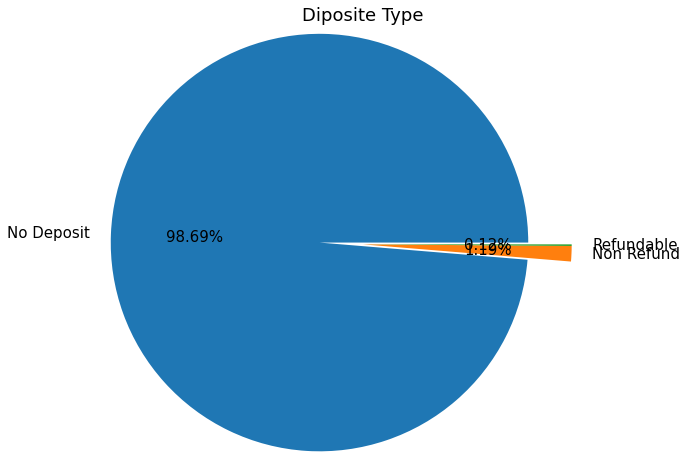

In [143]:
bs=pd.DataFrame(a["deposit_type"].value_counts())
plt.pie(bs["deposit_type"],labels=bs.index,autopct="%1.2f%%",radius=1.2,explode=[0.25,0,0]) 
plt.title("Diposite Type")
plt.show()

*   The most preferred deposit type is the "NO DEPOSIT".
*   Due to this, the Booking Cancellation Rate increases.

## *11) Which type of food(meal) is preferrd by customers ?*


[]

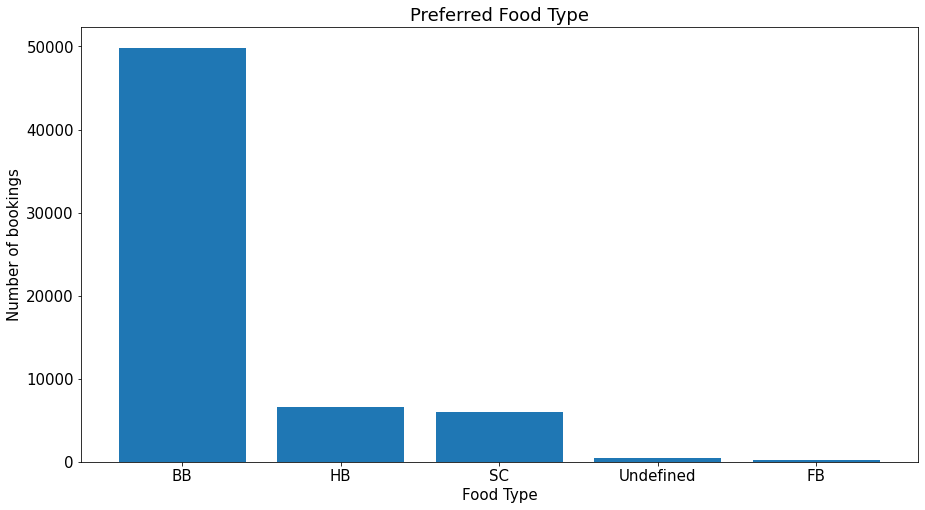

In [144]:
db=a[a["is_canceled"]==0]
db1=pd.DataFrame(db["meal"].value_counts())
plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams.update({"font.size": 15})
plt.bar(x=db1.index,height=db1["meal"])
plt.ylabel("Number of bookings")
plt.xlabel("Food Type")
plt.title("Preferred Food Type")
plt.plot()

*  BB is the most preferred Food Type.



## *12) Which country has the highest number of bookings by customers ?*

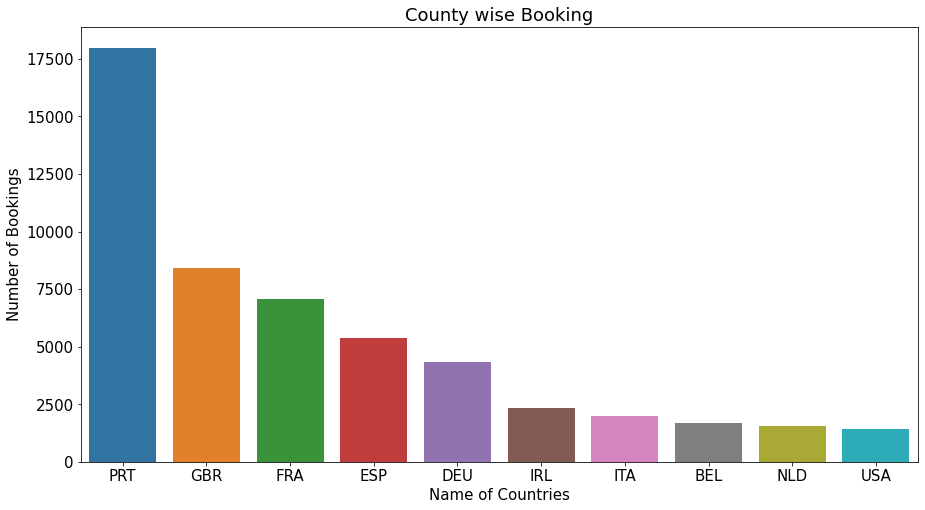

In [145]:
cb=a[a['is_canceled']==0]
cb=pd.DataFrame(cb["country"].value_counts()[:10].reset_index())
sns.barplot(x=cb["index"],y=cb["country"])
plt.ylabel("Number of Bookings")
plt.xlabel("Name of Countries")
plt.title("County wise Booking")
plt.show()

*   Generally most of the customers are from European countries.
*   Most bookings are done by PORTUGAL (PRT).

## *13) Which is the most booked accommodation type (Single, Couple, Family)?*

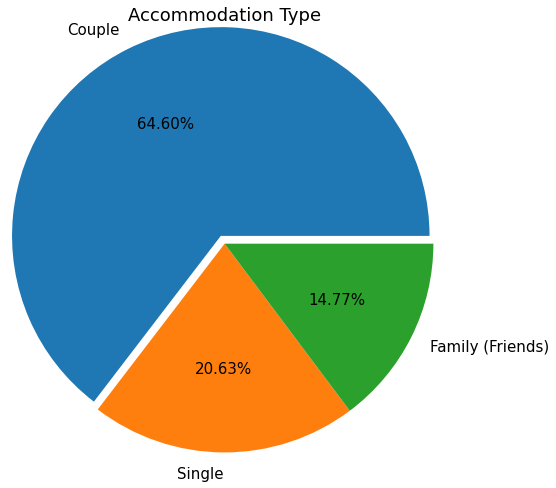

In [146]:
df2=a[a["is_canceled"]==0]
couple=df2[(df2["adults"]==2) & (df2["children"]==0) & (df2["babies"]==0)]
single=df2[(df2["adults"]==1) & (df2["children"]==0) & (df2["babies"]==0)]
family=df2[(df2["adults"] + df2["children"] + df2["babies"]>2)]

rows=[couple.shape[0],single.shape[0],family.shape[0]]
names=["Couple","Single","Family (Friends)"]

plt.pie(rows,labels=names,autopct="%1.2f%%",explode=[.05,0,0],radius=1.2)
plt.title("Accommodation Type")
plt.show()

* Usually the highest bookings are done by couple.

## *14) Which type of room is most in demand ?*

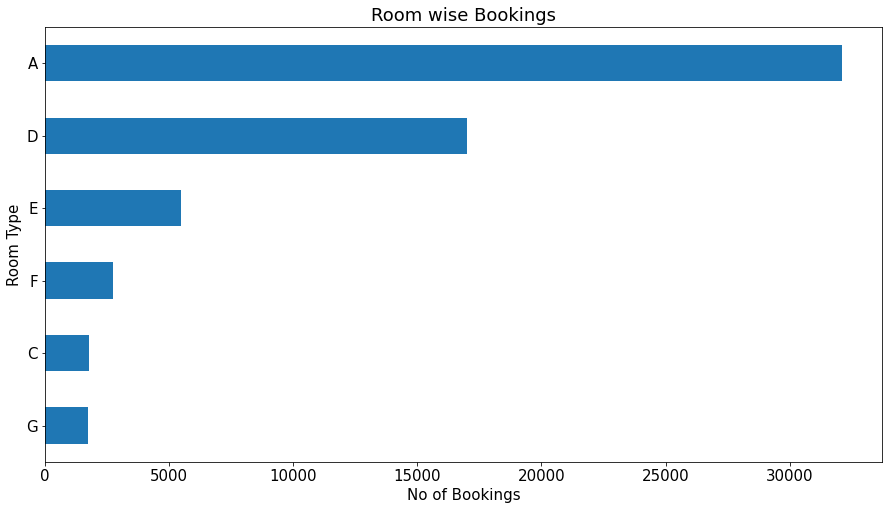

In [147]:
df2=a[a["is_canceled"]==0]
df2=df2['assigned_room_type'].value_counts()[:6].sort_values()

plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams.update({"font.size": 15})
df2.plot(kind="barh")
plt.ylabel("Room Type")
plt.xlabel("No of Bookings")
plt.title("Room wise Bookings")
plt.show()

* "A" type of room is most in demand.

## *15) How many nights guests choose to stay the hotel ?* 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


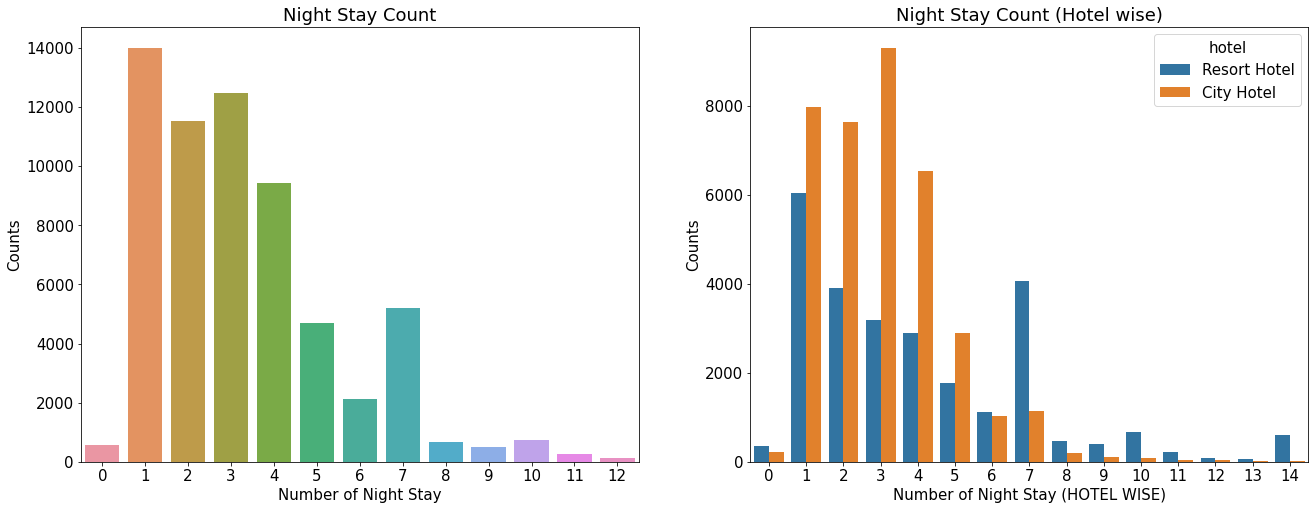

In [148]:
plt.rcParams["figure.figsize"]=(22,8)
plt.rcParams.update({"font.size": 15})
plt.subplot(1,2,1)

nn=a[a["is_canceled"]==0]
nn["total_stay"]=nn['stays_in_weekend_nights']+nn['stays_in_week_nights']
h=nn.groupby("total_stay").size()[:13]
sns.barplot(x=h.index,y=h.values)
plt.ylabel("Counts")
plt.xlabel("Number of Night Stay")
plt.title("Night Stay Count")

plt.subplot(1,2,2)
hg=a[a["is_canceled"]==0]
hg["total_stay"]=hg['stays_in_weekend_nights']+hg['stays_in_week_nights']
xy=hg[hg["total_stay"]<15]

sns.countplot(x="total_stay",hue="hotel",data=xy)
plt.ylabel("Counts")
plt.xlabel("Number of Night Stay (HOTEL WISE)")
plt.title("Night Stay Count (Hotel wise)")

plt.show()


*   From the 1st chart it can be said that generally people to stay 1 to 4 nights in hotel.
*   From the 2nd chart it can be said that generally people prefer City hotel for short stay, but for long stays Resort Hotel is preferred.


## *16) What is the ratio of repeated guest ?*

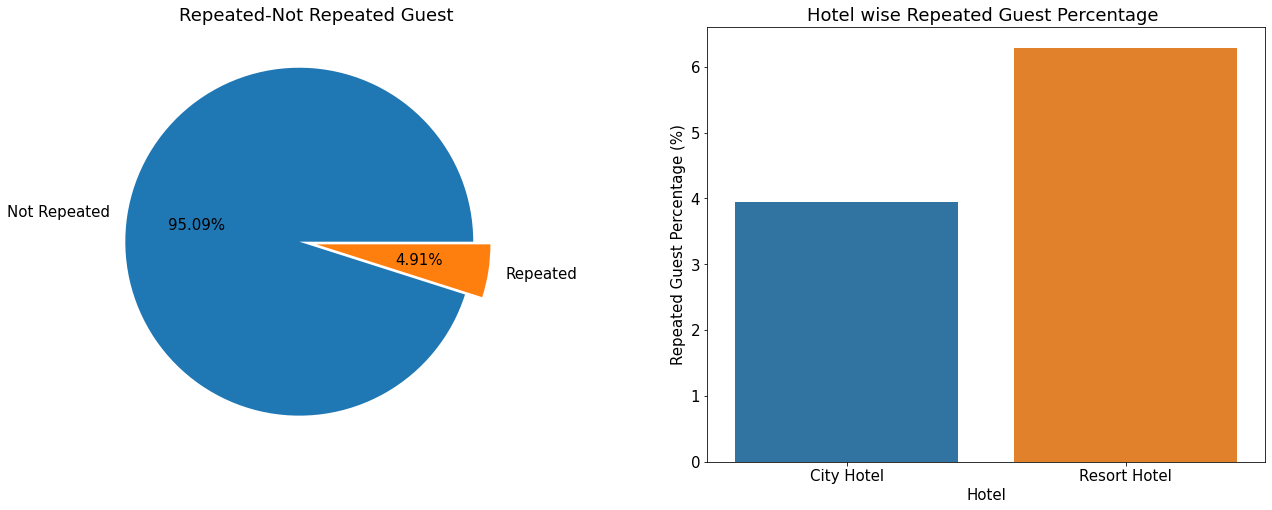

In [149]:
vc=a[a["is_canceled"]==0]
bv=vc["is_repeated_guest"].value_counts()

plt.rcParams["figure.figsize"]=(22,8)
plt.rcParams.update({"font.size": 15})

plt.subplot(1,2,1)

plt.pie(x=list(bv.values),labels=["Not Repeated","Repeated"],autopct="%1.2f%%",explode=[.1,0])
plt.title("Repeated-Not Repeated Guest")


plt.subplot(1,2,2)

zz=pd.DataFrame(vc.groupby(["hotel","is_repeated_guest"]).size()).reset_index()
yy=zz.pivot(index="hotel",columns="is_repeated_guest",values=0)
yy["total"]=yy[0]+yy[1]
yy["percentage"]=round(yy[1]/yy["total"]*100,2)
sns.barplot(x=yy.index,y=yy["percentage"])
plt.ylabel("Repeated Guest Percentage (%)")
plt.xlabel("Hotel")
plt.title("Hotel wise Repeated Guest Percentage ")

plt.show()

*   From the first chart it can be said that the ratio of repeated guest is 4.91% , It is vey less.
*   From the second chart it can be said that Resort Hotel has more number of repeated guest than City Hotel.

## *17) Which month has the highest ADR (Hotel wise) ?*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


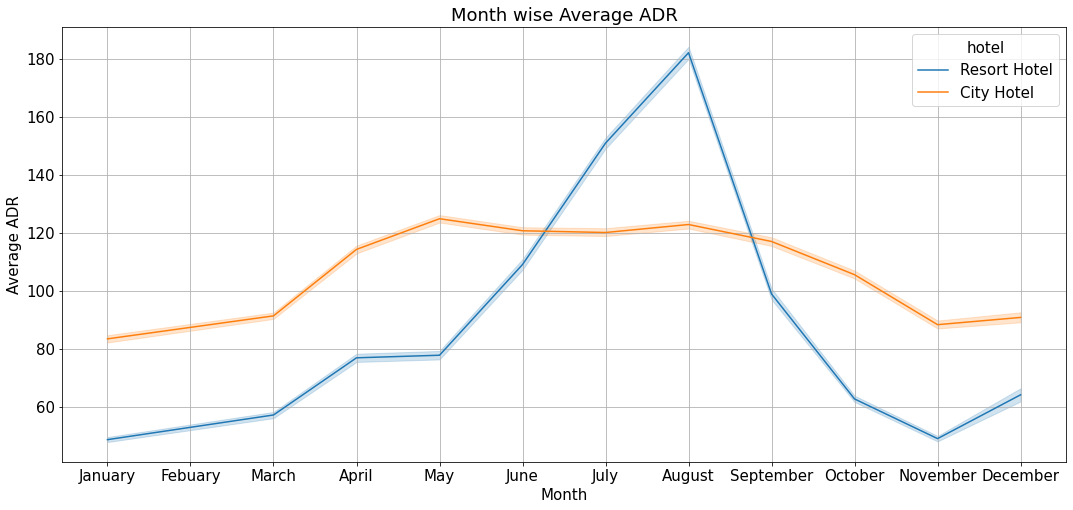

In [150]:
ds=a[a["is_canceled"]==0]
plt.rcParams["figure.figsize"]=(18,8)
x= ['January', 'Febuary','March','April','May','June','July','August','September','October','November','December']
ds['arrival_date_month'] = pd.Categorical(ds['arrival_date_month'],categories=x,ordered=True)
plt.rcParams.update({"font.size": 15})
sns.lineplot( x = 'arrival_date_month', y = 'adr', hue = 'hotel',data = ds)
plt.ylabel("Average ADR")
plt.xlabel("Month")
plt.title("Month wise Average ADR")
plt.grid()

plt.show()

*   From the chart it can be said that during the month of July to September the average ADR of the Resort Hotel is higher than City hotel while in rest of months average ADR of the City Hotel is higher than Resort Hotel. 

## *18) What is the average ADR of hotel ?*

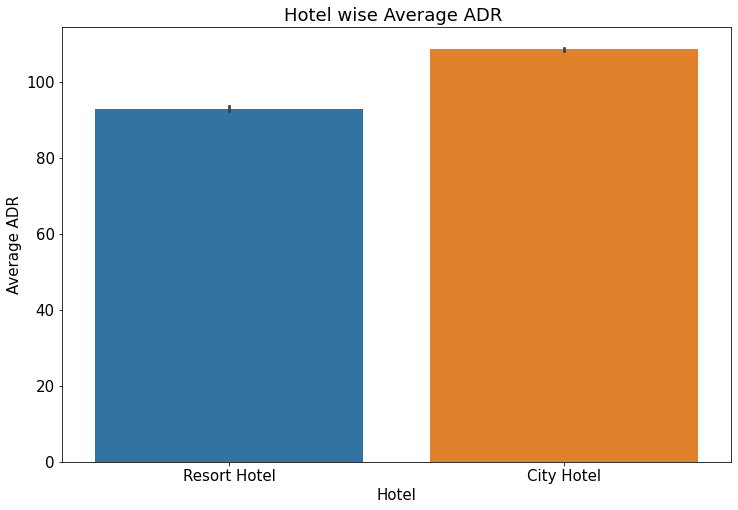

In [151]:
plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams.update({"font.size": 15})
sns.barplot(x="hotel",y="adr",data=ds)
plt.ylabel("Average ADR")
plt.xlabel("Hotel")
plt.title("Hotel wise Average ADR ")
plt.show()

*   Generally the average ADR of Resort Hotel is lower than City Hotel.

## *19) By which market segment are the most bookings done ?*

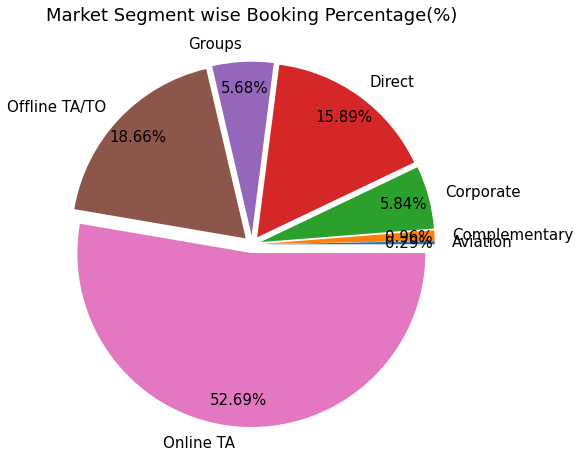

In [152]:
sr=a[a["is_canceled"]==0]
fg=sr.groupby(['market_segment']).size()
plt.rcParams.update({"font.size": 15})
plt.pie(x=fg.values,labels=fg.index,autopct="%1.2f%%",explode=[.050]*7,pctdistance=0.85,radius=1)
plt.title("Market Segment wise Booking Percentage(%)")
plt.show()

*   The highest bookings is done by "Online TA". 

## *20) Which market segment has the longest lead time ?*

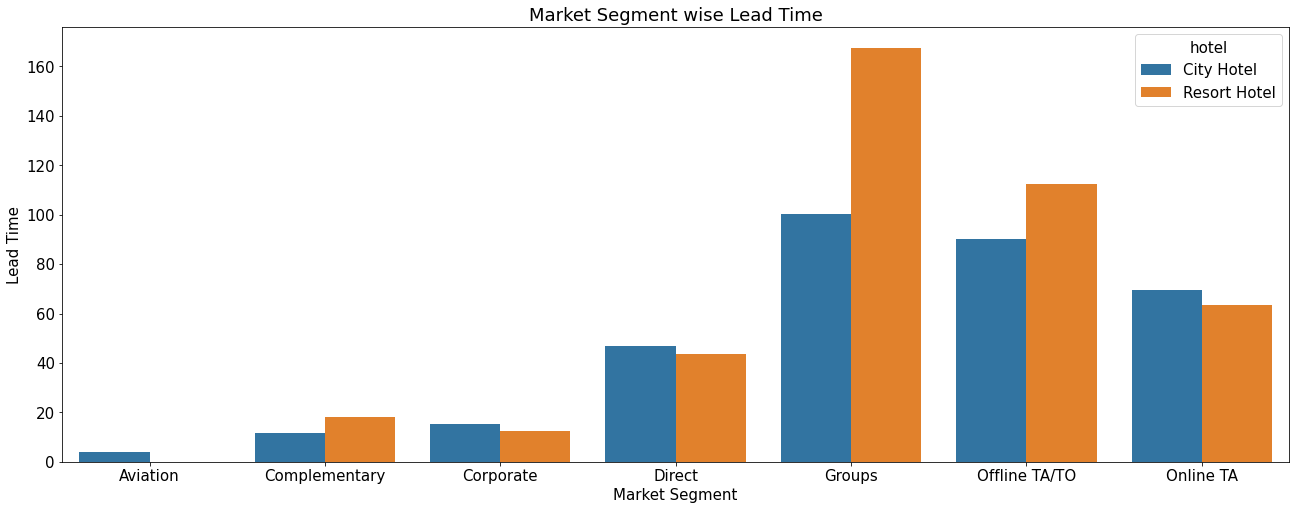

In [153]:
lt=sr=a[a["is_canceled"]==0]
vr=lt.groupby(["hotel","market_segment"]).agg({"lead_time":"mean"}).reset_index()
plt.rcParams["figure.figsize"]=(22,8)
plt.rcParams.update({"font.size": 15})
sns.barplot(x="market_segment",y="lead_time",hue="hotel",data=vr)
plt.ylabel("Lead Time")
plt.xlabel("Market Segment")
plt.title("Market Segment wise Lead Time")
plt.show()




*  "Groups" type Market Segment has the longest lead time for both Hotels. so we can say that early booking is essential for "Groups" type Market Segment.



## *21) Correlation between two parameters.*

In [154]:
a["total_stay"]=a['stays_in_week_nights']+a['stays_in_weekend_nights']
a["total_people"]=a['adults']+a['children']+a['babies']

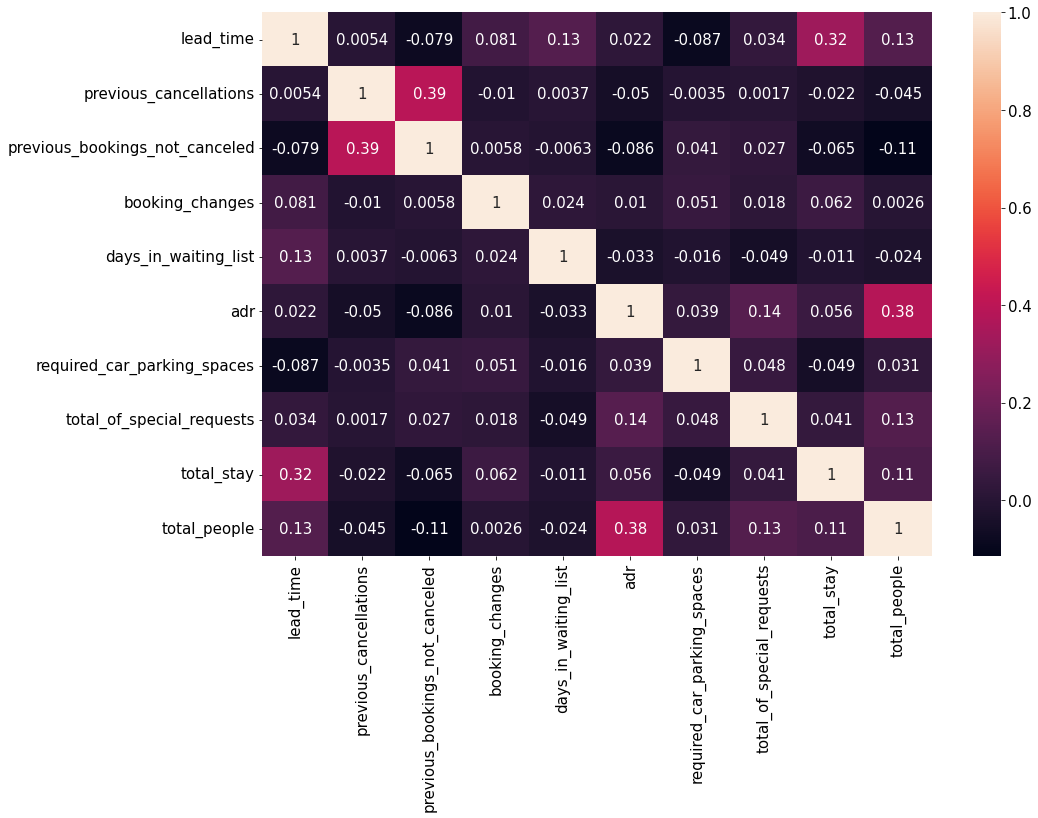

In [155]:
fb = a[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests',"total_stay","total_people"]]
zz=fb.corr()
plt.rcParams["figure.figsize"]=(15,10)
sns.heatmap(zz,annot = True)
plt.show()

*  "Total stay length" and "lead time" have slight correlation, that means  
for longer hotel stays people generally plan little before the actual arrival.
*  "ADR" is slightly correlated with "total_people", which makes sense as more number of people means more revenue, therefore more ADR.

## *22) Relationship between number of Total Stay and ADR.*

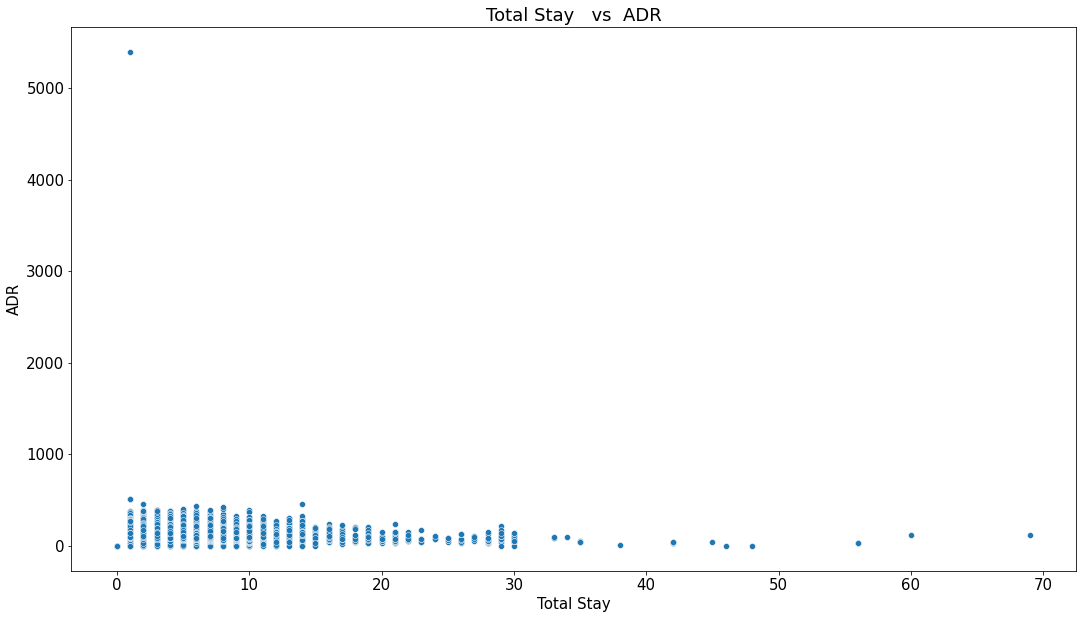

In [156]:
plt.rcParams["figure.figsize"]=(18,10)
plt.rcParams.update({"font.size": 15})
sns.scatterplot(x=a["total_stay"],y=a["adr"])
plt.ylabel("ADR")
plt.xlabel("Total Stay")
plt.title("Total Stay   vs  ADR")
plt.show()



*  From the chart it can be said that length of Total Stay  increases the ADR decreases. That means longer stay is beneficial for customer.

